# AIML CA1 - Classification Dataset
##### Done By: Ang Miao Yi 

----------------------------------------------------------------------------------------------------------------------------

### Background Research (From Kaggle)
##### 1. pH value: PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

##### 2. Hardness: Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

##### 3. Solids (Total dissolved solids - TDS): Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

##### 4. Chloramines: Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

##### 5. Sulfate: Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

##### 6. Conductivity: Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

##### 7. Organic_carbon: Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

##### 8. Trihalomethanes: THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

##### 9. Clarity: The clarity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean clarity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

##### 10. Potability (Quality): Indicates if water is safe for human consumption where 1 means Potable (Good Quality) and 0 (Poor Quality) means Not potable.

##### Run all codes at once (From top to bottom)

In [1]:
# Import all required libraries
# =========================================================================================================================
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt # For Plotting (Scatter Graph, BoxPlot, Linear Graph etc)
import warnings 
warnings.filterwarnings('ignore') # To ignore any warnings

In [2]:
# Import Dataset
# =========================================================================================================================
dataset = pd.read_csv('./CA1-Dataset/CA1-Classification-Dataset.csv', sep=',')
dataset.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Clarity,Quality
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
# Checking for missing values
# =========================================================================================================================
print(dataset.isna().sum().sort_values()) #Checking for missing values

Hardness             0
Solids               0
Chloramines          0
Conductivity         0
Organic_carbon       0
Clarity              0
Quality              0
Trihalomethanes    162
ph                 491
Sulfate            781
dtype: int64


##### For the above cell, it can be seen that there are missing values for the column "Trihalomethanes", "ph" and "sulfate". Hence, we need to impute them.

-----------------------------------------------------------------------------------------------------------------------------

# Feature Relevance to the target variable

In [4]:
# Split data (Before impute)
# =========================================================================================================================
from sklearn.model_selection import train_test_split

# Create X and y where X is features while y is the target variable, "Quality" column is dropped for X
X = dataset.drop(["Quality"], axis=1).values
y = dataset["Quality"].values
print(type(X), type(y)) 

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [5]:
# Impute the data
# =========================================================================================================================
from sklearn.impute import SimpleImputer

# Instantiate the impute model
imp = SimpleImputer(strategy='mean')

# Fitting the impute model into the training data to transform the data
X_train = imp.fit_transform(X_train)
X_test = imp.transform(X_test)

##### Before we find determine the relevancy of each feature to the target variable, we need to split and impute the missing data or else the code will produce errors since the data must not have any missing values when using the data to train a model.

In [6]:
# Feature Relevance to target variable
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Create a Random Forest Classifier
rf = RandomForestClassifier()

# Fit the model into the training data
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = rf.feature_importances_
print(feature_importances)

indices = np.argsort(feature_importances)[::-1]

# Getting features name
feature_names = dataset.drop("Quality", axis=1).columns

# Print feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. Feature '{feature_names[indices[f]]}' ({feature_importances[indices[f]]})")

[0.12673576 0.12026372 0.11339429 0.11451951 0.13025551 0.09954658
 0.10109549 0.09884861 0.09534053]
Feature ranking:
1. Feature 'Sulfate' (0.13025550676376435)
2. Feature 'ph' (0.12673575900493483)
3. Feature 'Hardness' (0.12026371658641803)
4. Feature 'Chloramines' (0.11451951467407726)
5. Feature 'Solids' (0.11339429246204619)
6. Feature 'Organic_carbon' (0.101095489826339)
7. Feature 'Conductivity' (0.09954657956280787)
8. Feature 'Trihalomethanes' (0.09884861035781675)
9. Feature 'Clarity' (0.0953405307617956)


##### The cell above illustrates my process for identifying the top 5 most relevant features. This approach aims to enhance model accuracy by focusing on key factors for prediction while minimizing the influence of less relevant features.

-----------------------------------------------------------------------------------------------------------------------------

# Start of Actual Model

##### I chose KNN because of its simplicity, relying on distance metrics for predictions across diverse data types. It is good for handling classification and regression without strict data assumptions. Additionally, I chose Random Forests for high accuracy. By combining multiple decision trees, they excel in complex datasets, providing feature importance insights and handling outliers effectively. Lastly, Decision Trees offer clear decision paths, aiding in understanding predictions and they excel in handling categorical and numerical data. Hence, I chose Decision Tree also.



In [7]:
# Split data (Before impute)
# =========================================================================================================================
from sklearn.model_selection import train_test_split

# I create X and y again because I have to drop the remaining features that are less important from the feature engineering
X = dataset.drop(["Quality", "Conductivity", "Organic_carbon", "Trihalomethanes", "Clarity"], axis=1).values
y = dataset["Quality"].values
print(type(X), type(y))

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


### 1. Impute missing values in dataset

In [8]:
# Impute the data
# =========================================================================================================================
from sklearn.impute import SimpleImputer

# Instantiate the impute model
imp = SimpleImputer(strategy='mean')

# Fitting the model into the training data to transform the data
X_train = imp.fit_transform(X_train)
X_test = imp.transform(X_test)

### 2. Creating dummy classifier baseline for model comparison

In [9]:
# Create dummy baseline (Classifier)
# =========================================================================================================================
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Instantiate the dummy classifier model and fit model into the training data
dummy_clsf = DummyClassifier(strategy='most_frequent')
dummy_clsf.fit(X_train, y_train)

# Used the dummy classifier model to predict y using X_test
y_pred = dummy_clsf.predict(X_test)

# Classification Report
print(classification_report(y_test, y_pred))

# Accuracy Score
print(f"Accuracy Score (Dummy Baseline): {dummy_clsf.score(X_test, y_test) * 100}%")

# Confusion Matrix
print(f"\nConfusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

              precision    recall  f1-score   support

           0       0.60      1.00      0.75       395
           1       0.00      0.00      0.00       261

    accuracy                           0.60       656
   macro avg       0.30      0.50      0.38       656
weighted avg       0.36      0.60      0.45       656

Accuracy Score (Dummy Baseline): 60.213414634146346%

Confusion Matrix:
[[395   0]
 [261   0]]


-------------------------------------------------------------------------------------------------------------------------------------------------------------

### 3. Creating KNN Model without changing anything

In [10]:
# Train the model (KNN) - BEFORE
# =========================================================================================================================
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Instantiate the KNN Model with n_neightbors, 5
knn = KNeighborsClassifier(n_neighbors=5)

# KNN Model is fitted into the training data and X_test is used to predict y
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Classification Report
print(classification_report(y_test, y_pred))

# Accuracy Score
print(f"Accuracy Score (KNN): {knn.score(X_test, y_test) * 100}%")

# Confusion Matrix
print(f"\nConfusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

              precision    recall  f1-score   support

           0       0.59      0.72      0.65       395
           1       0.37      0.25      0.29       261

    accuracy                           0.53       656
   macro avg       0.48      0.48      0.47       656
weighted avg       0.50      0.53      0.51       656

Accuracy Score (KNN): 53.04878048780488%

Confusion Matrix:
[[284 111]
 [197  64]]


### 4. Evaluating ROC Curve of KNN - Before Change

0.4


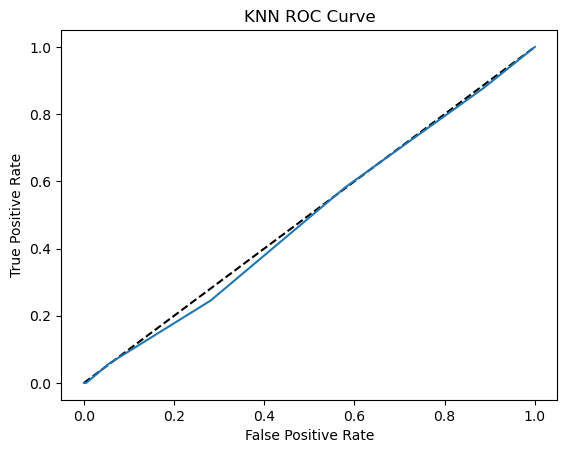

ROC AUC Score: 0.48969397157961103


In [11]:
# Evaluating KNN model performance with ROC Curve - BEFORE
# =========================================================================================================================
from sklearn.metrics import roc_curve, roc_auc_score

# Proability of Model
y_pred_probs = knn.predict_proba(X_test)[:, 1]
print(y_pred_probs[0])

# Compute the false positive rate, true positive rate and thresholds using the roc_curve function
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

# Plot the diagonal line, which represents a random classifier
plt.plot([0, 1], [0, 1], 'k--')

# Plot the ROC curve. Blue curve represents KNN classifier's performance
plt.plot(fpr, tpr)

# Adding labels and title, and show the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.show()

# Print out the Area Under Curve (AUC) score
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_probs)}")

### 5. Scaling of Data, Hyperparameter Tuning for KNN Model

In [12]:
# Scaling the data
# =========================================================================================================================
from sklearn.preprocessing import StandardScaler

# Instantiate the scaler model
scaler = StandardScaler()

# Fitting the scaler model into the training data to transform the data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### For the above cell:

##### The process of scaling the data is particularly beneficial for distance-based models like K-Nearest Neighbors (KNN). Since KNN relies on distance metrics to train and predict, scaling the data ensures that all features contribute proportionately by being on a similar scale. This normalization prevents certain features from dominating the distance calculations solely due to their larger magnitude, thereby aiding KNN's accuracy.

In [13]:
# Hyperparameter Tuning (GridSearchCV) with Scaling
# =========================================================================================================================
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Create a pipeline
steps = [('scaler', StandardScaler()),
         ('knn', KNeighborsClassifier())]
pipeline = Pipeline(steps)

# Create a dictionary with the hyperparameters to tune
parameters = {"knn__n_neighbors": np.arange(1, 31)}

# Perform gridsearchcv to find the best hyperparameter
cv = GridSearchCV(pipeline, param_grid=parameters)
cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)

# Output the results
print(cv.best_score_)
print(cv.best_params_)

0.6797709923664123
{'knn__n_neighbors': 10}


##### The above cell is for hyperparameter tuning for KNN, which sets up a pipeline with feature scaling and a K-Nearest Neighbors classifier. GridSearchCV tunes the KNN model with neighbor values from 1 to 30, trains it on X_train and y_train, and evaluates on X_test. It prints the best cross-validated score and hyperparameters, which is 10.

### 6. Testing KNN Model after scaling of data and hyperparameter tuning

In [14]:
# KNN after scaling and hyperparameter tuning - AFTER
# =========================================================================================================================
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Instantiate the KNN Model with n_neightbors, 10 (from GridSearchCV above)
knn = KNeighborsClassifier(n_neighbors=10)

# KNN Model is fitted into the training data and X_test is used to predict y
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Classification Report
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

# Accuracy Score
print(f"Accuracy Score (KNN): {knn.score(X_test, y_test) * 100}%")

# Confusion Matrix
print(f"\nConfusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.89      0.77       395
           1       0.69      0.38      0.49       261

    accuracy                           0.68       656
   macro avg       0.69      0.63      0.63       656
weighted avg       0.69      0.68      0.66       656

Accuracy Score (KNN): 68.4451219512195%

Confusion Matrix:
[[351  44]
 [163  98]]


In [15]:
# Evaluating KNN model using cross-validation - AFTER
# =========================================================================================================================
from sklearn.model_selection import cross_val_score

# Perform cross-validation with 5 folds and print the results
knn_clf_results = cross_val_score(knn, X_train, y_train, cv=5)
print('KNN:', knn_clf_results)
print('KNN Average Score: {:.2f}%'.format(knn_clf_results.mean()*100))

KNN: [0.70610687 0.64694656 0.6870229  0.68129771 0.67366412]
KNN Average Score: 67.90%


##### The above cell is for k-fold cross validation for KNN Model, which computes the score 5 consecutive times (with different splits each time) and it shows that the average accuracy score for the KNN model is about 67.9%.

### 7. Evaluating ROC Curve of KNN - After Change

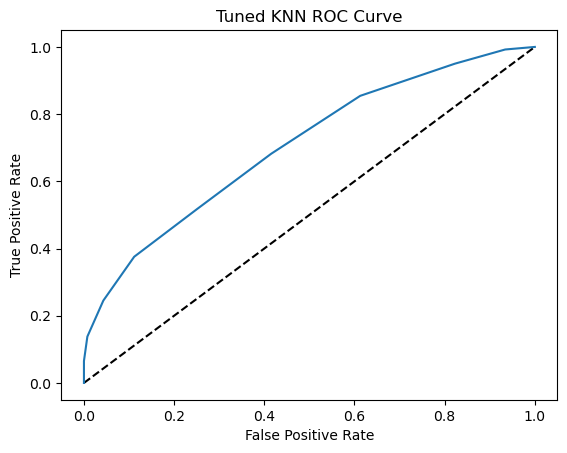

ROC AUC Score: 0.7046510500024249


In [16]:
# Evaluating KNN model performance with ROC Curve - AFTER
# =========================================================================================================================
from sklearn.metrics import roc_curve, roc_auc_score

# Proability of Model
y_pred_probs = knn.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate and thresholds using the roc_curve function
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

# Plot the diagonal line, which represents a random classifier
plt.plot([0, 1], [0, 1], 'k--')

# Plot the ROC curve. Blue curve represents tuned KNN classifier's performance
plt.plot(fpr, tpr)

# Adding labels and title, and show the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Tuned KNN ROC Curve')
plt.show()

print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_probs)}")

##### The above cell shows the improved roc curve score of about 0.70 after scaling of the data and doing hyperparameter tuning on the model. As compared to the original roc curve score of about 0.48, it is a significant improvement, showing that the model has better predictive ability.

---------------------------------------------------------------------------------------------------------------------------

### 8. Creating Decision Tree Model without changing anything

In [17]:
# Training the model (Decision Tree) - BEFORE
# =========================================================================================================================
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Instantiate the Decision Tree Model
dTree = DecisionTreeClassifier() 

# Fit the model into the training data
dTree.fit(X_train, y_train)
y_pred = dTree.predict(X_test)

# Classification Report
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

# Accuracy Score
print(f"Accuracy Score (Decision Tree): {dTree.score(X_test, y_test) * 100}%")

# Confusion Matrix
print(f"\nConfusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.67      0.67       395
           1       0.49      0.48      0.49       261

    accuracy                           0.60       656
   macro avg       0.58      0.58      0.58       656
weighted avg       0.60      0.60      0.60       656

Accuracy Score (Decision Tree): 59.756097560975604%

Confusion Matrix:
[[266 129]
 [135 126]]


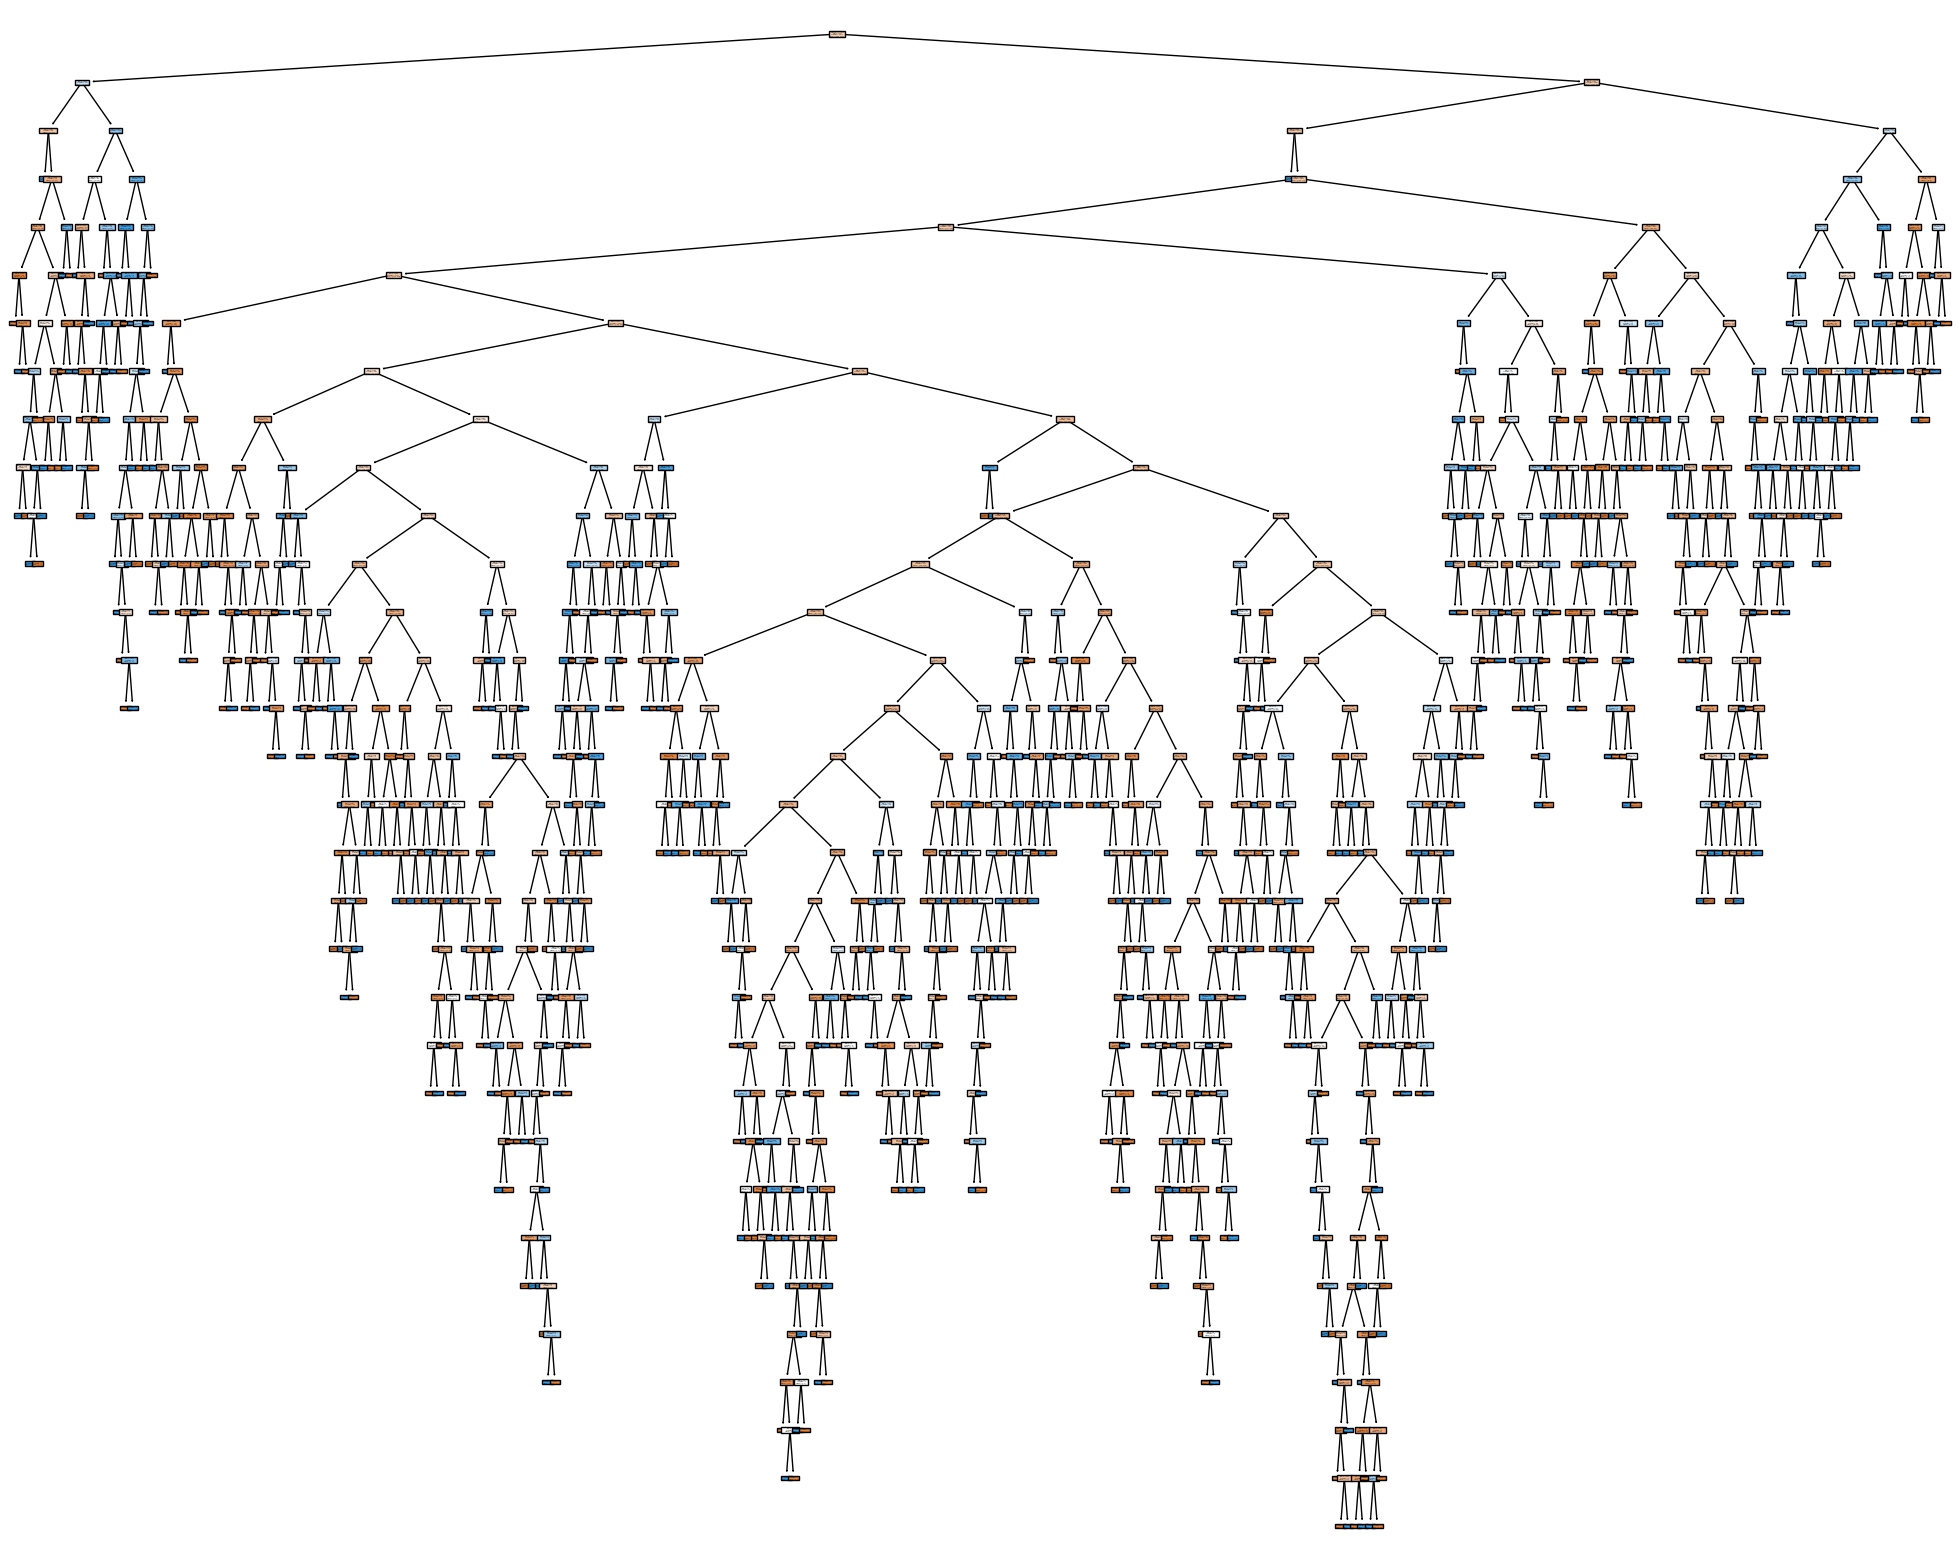

In [18]:
# Plotting the Decision Tree - BEFORE hyperparameter tuning
# =========================================================================================================================
from matplotlib import pyplot as plt
from sklearn import tree

# Plot the decision tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dTree, feature_names= [
    'ph', 
    'Hardness', 
    'Solids', 
    'Chloramines', 
    'Sulfate', 
    'Conductivity', 
    'Organic_carbon',  
    'Trihalomethanes',
    'Clarity'],
    filled=True)

### 9. Evaluating ROC Curve of Decision Tree - Before Change

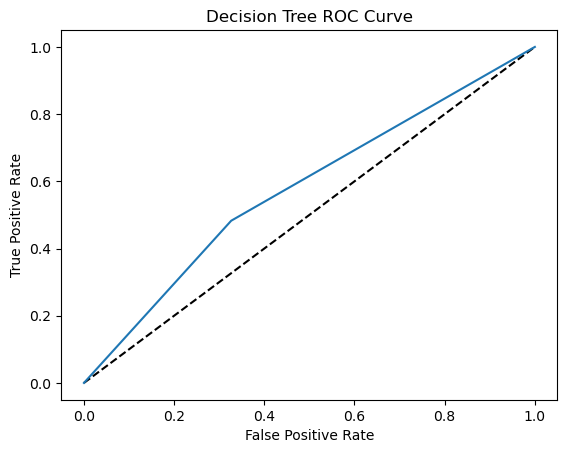

ROC AUC Score: 0.5780881711043213


In [19]:
# Evaluating Decision Tree model performance with ROC Curve - BEFORE
# =========================================================================================================================
from sklearn.metrics import roc_curve, roc_auc_score

# Proability of Decision Tree Model
y_pred_probs = dTree.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate and thresholds using the roc_curve function
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

# Plot the diagonal line, which represents a random classifier
plt.plot([0, 1], [0, 1], 'k--')

# Plot the ROC curve. Blue curve represents Decision Tree classifier's performance
plt.plot(fpr, tpr)

# Adding labels and title, and show the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.show()

print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_probs)}")

### 10. Hyperparameter Tuning (max_depth) for Decision Tree & Testing Model After Tuning

In [20]:
# Changing the max_depth (Hyperparameter Tuning)
# =========================================================================================================================
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, KFold

# Create a KFold object with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Instantiate the Decision Tree Model
dTree = DecisionTreeClassifier()

# Create a dictionary with the hyperparameters to tune
param_dist = {'max_depth': np.arange(1, 31)}

# Perform gridsearchcv to find the best hyperparameter
cv = GridSearchCV(dTree, param_grid=param_dist, cv=kf)
cv.fit(X_train, y_train)

# Output the results
best_max_depth = cv.best_params_['max_depth']
print(f"Best max_depth: {best_max_depth}\n")


# Training the model (Decision Tree) - AFTER (Hyperparameter Tuning)
# =========================================================================================================================
# Instantiate the Decision Tree Model with best max_depth from GridSearchCV
dTree = DecisionTreeClassifier(max_depth=best_max_depth)
dTree.fit(X_train, y_train)
y_pred = dTree.predict(X_test)

# Classification Report
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

# Accuracy Score
print(f"Accuracy Score (Decision Tree): {dTree.score(X_test, y_test) * 100}%")

# Confusion Matrix
print(f"\nConfusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

Best max_depth: 7

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.88      0.74       395
           1       0.60      0.27      0.37       261

    accuracy                           0.64       656
   macro avg       0.62      0.58      0.56       656
weighted avg       0.63      0.64      0.60       656

Accuracy Score (Decision Tree): 63.71951219512195%

Confusion Matrix:
[[347  48]
 [190  71]]


##### The above cell conducts a Grid Search Cross Validation which helps to find the best max_depth (parameter) for the decision tree, which can potentially increase the accuracy of the model in predicting. In this case, it did. After training the model with the best max_depth, the accuracy score of the decision tree increased from 59% to about 63%.

In [21]:
# Evaluating Decision Tree model using cross-validation - AFTER
# =========================================================================================================================
from sklearn.model_selection import cross_val_score

# Perform cross-validation with 5 folds and print the results
dTree_clf_results = cross_val_score(dTree, X_train, y_train, cv=5)

# Output the results
print('Decision Tree:', dTree_clf_results)
print('Decision Tree Average Score: {:.2f}%'.format(dTree_clf_results.mean()*100))

Decision Tree: [0.63740458 0.65458015 0.63358779 0.63931298 0.6221374 ]
Decision Tree Average Score: 63.74%


##### The above cell is for k-fold cross validation for Decision Tree Model, which computes the score 5 consecutive times (with different splits each time) and it shows that the average accuracy score for the Decision Tree model is about 63.78%.

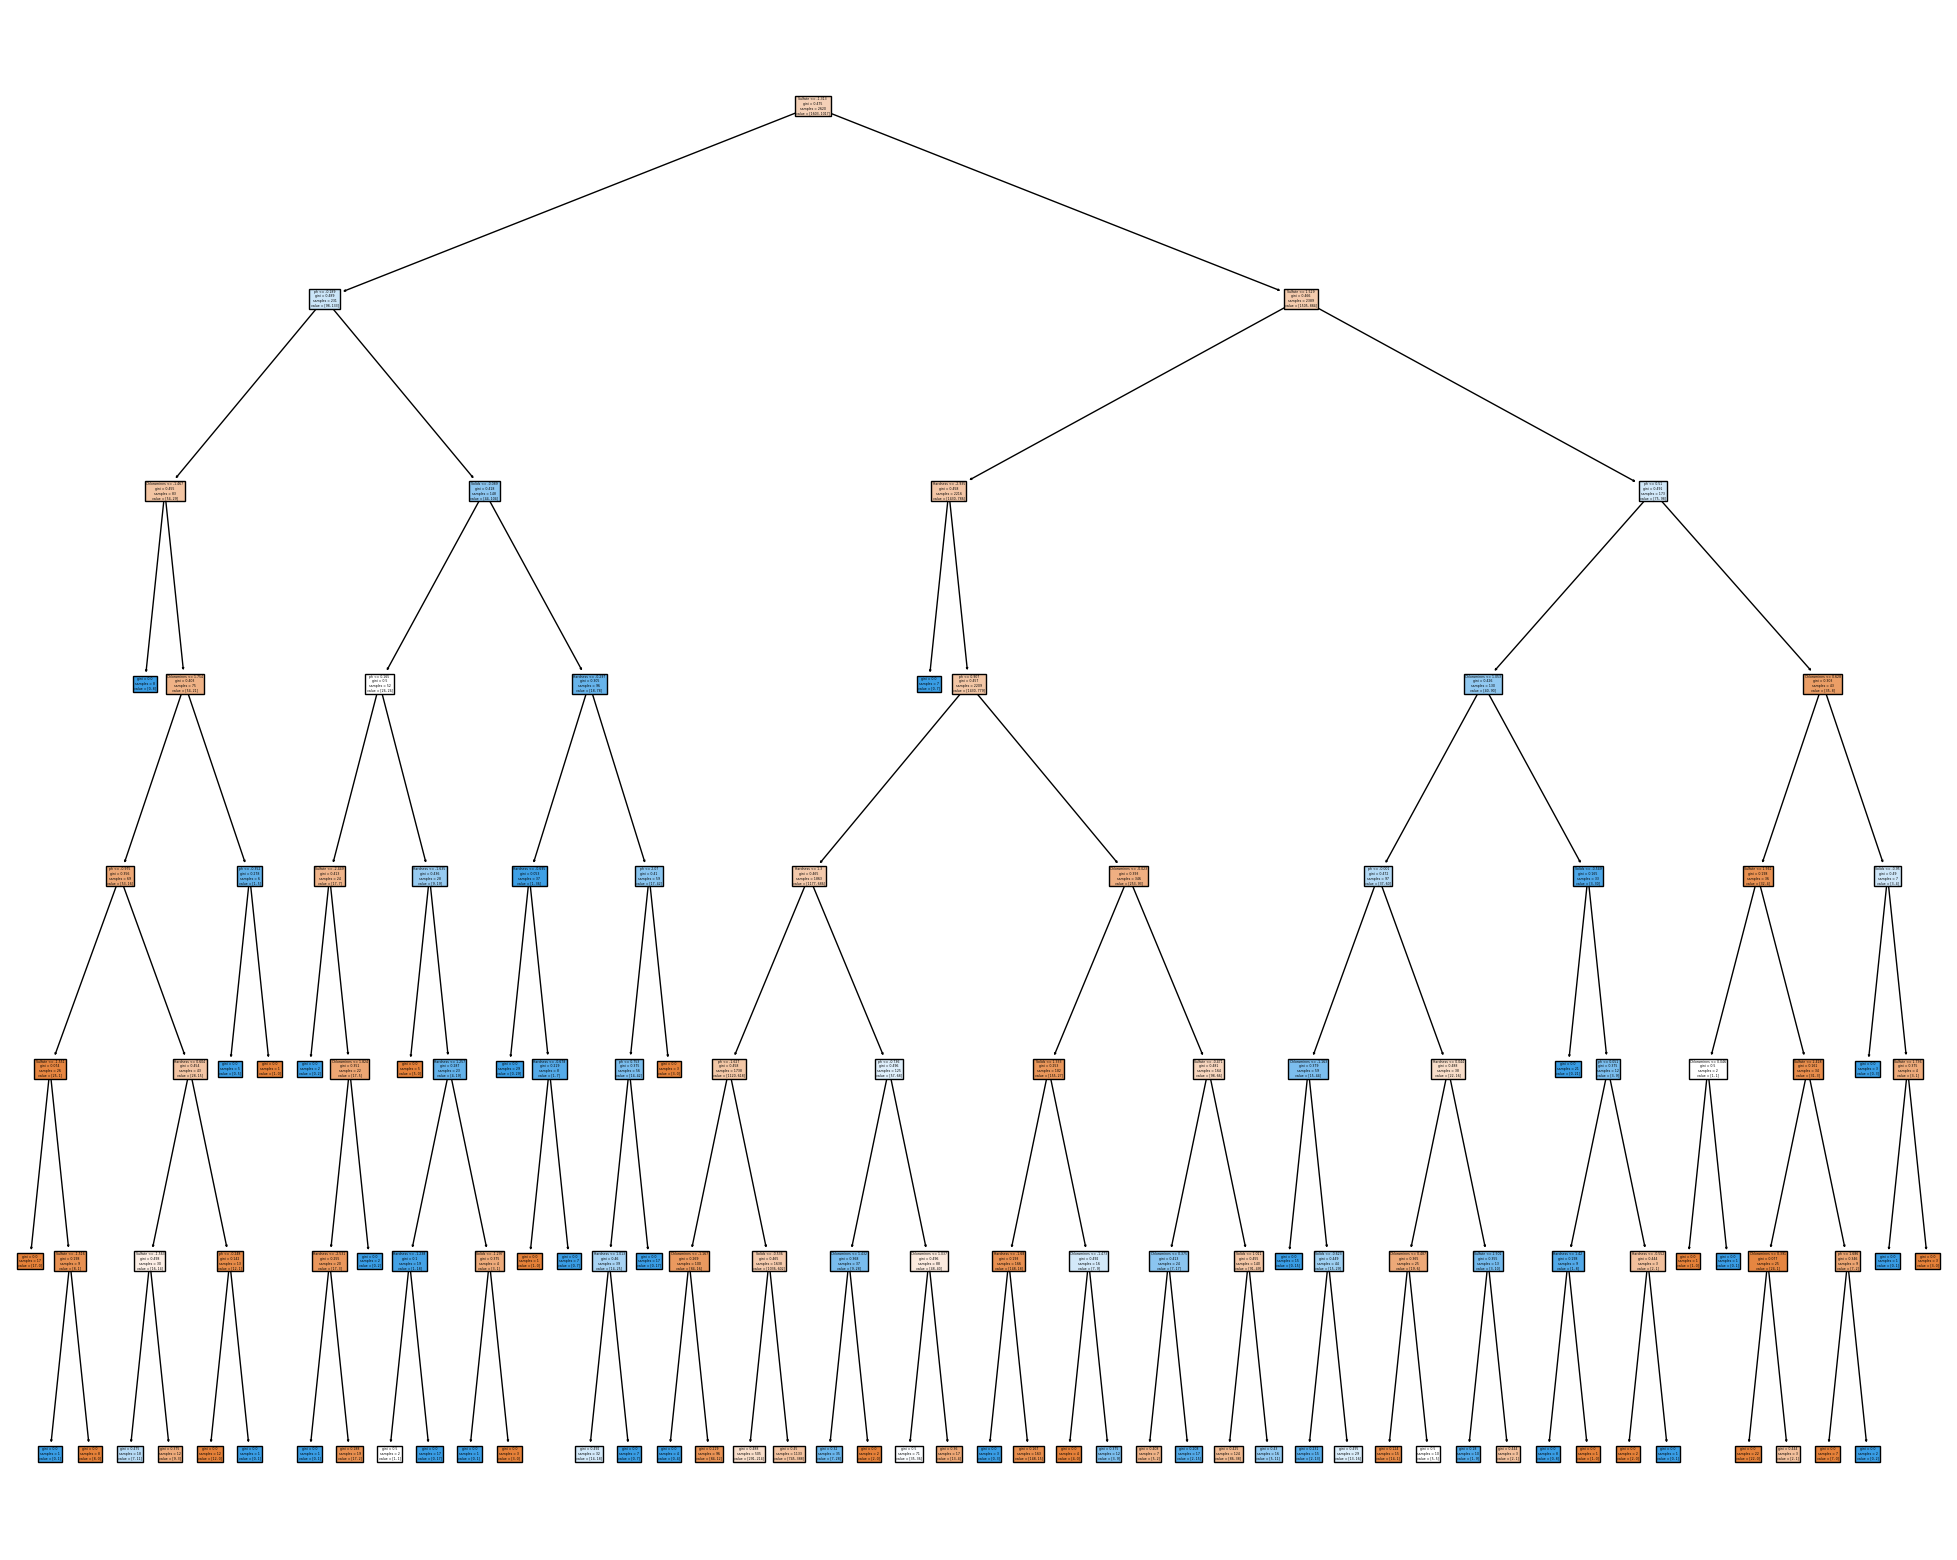

In [22]:
# Plotting of the Decision Tree - AFTER (Hyperparameter tuning)
# =========================================================================================================================
from matplotlib import pyplot as plt
from sklearn import tree

# Plot the decision tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dTree, feature_names= [
    'ph', 
    'Hardness', 
    'Solids', 
    'Chloramines', 
    'Sulfate', 
    'Conductivity', 
    'Organic_carbon',  
    'Trihalomethanes',
    'Clarity'],
    filled=True)

### 11. Evaluating ROC Curve of Decision Tree - After Change

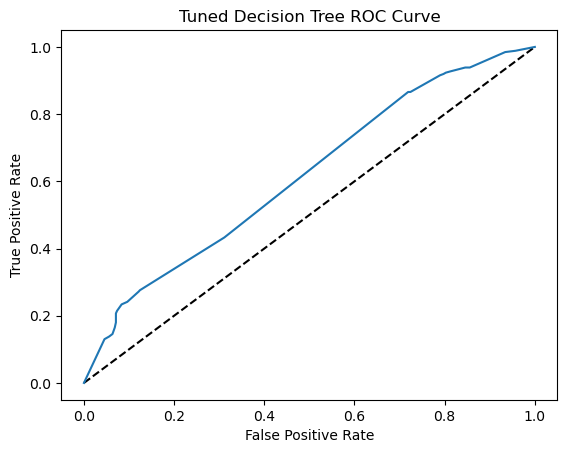

ROC AUC Score: 0.6157039623648091


In [23]:
# Evaluating Decision Tree model performance with ROC Curve - AFTER
# =========================================================================================================================
from sklearn.metrics import roc_curve, roc_auc_score

# Proability of Decision Tree Model
y_pred_probs = dTree.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate and thresholds using the roc_curve function
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

# Plot the diagonal line, which represents a random classifier
plt.plot([0, 1], [0, 1], 'k--')

# Plot the ROC curve. Blue curve represents tuned Decision Tree classifier's performance
plt.plot(fpr, tpr)

# Adding labels and title, and show the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Tuned Decision Tree ROC Curve')
plt.show()

# Print out the Area Under Curve (AUC) score
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_probs)}")

##### The above cell shows the ROC curve for the decision tree, with an improvement in the ROC AUC Score, increasing from about 0.57 to 0.61 after hyperparameter tuning. However, it is not better than the KNN model in terms of accuracy, ROC AUC Score and confusion matrix.

-----------------------------------------------------------------------------------------------------------

### 12. Creating Random Forest Model without changing anything

In [24]:
# Train the model (Random Forest) - BEFORE
# =========================================================================================================================
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Instantiate the Random Forest Model
rf = RandomForestClassifier()

# Fit the model into the training data
rf.fit(X_train, y_train)

# Predict y using X_test
y_pred = rf.predict(X_test)

# Classification Report
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

# Accuracy Score
print(f"Accuracy Score (Random Forest): {rf.score(X_test, y_test) * 100}%")

# Confusion Matrix
print(f"\nConfusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.84      0.75       395
           1       0.63      0.40      0.49       261

    accuracy                           0.67       656
   macro avg       0.65      0.62      0.62       656
weighted avg       0.66      0.67      0.65       656

Accuracy Score (Random Forest): 66.76829268292683%

Confusion Matrix:
[[333  62]
 [156 105]]


### 13. Evaluating ROC Curve of Random Forest - Before Change

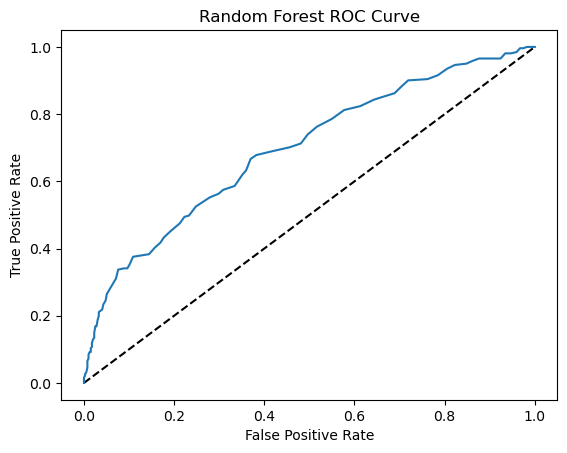

ROC AUC Score: 0.6953974489548475


In [25]:
# Evaluating Random Forest model performance with ROC Curve - BEFORE
# =========================================================================================================================
from sklearn.metrics import roc_curve, roc_auc_score

# Proability of Random Forest Model
y_pred_probs = rf.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate and thresholds using the roc_curve function
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

# Plot the diagonal line, which represents a random classifier
plt.plot([0, 1], [0, 1], 'k--')

# Plot the ROC curve. Blue curve represents Random Forest classifier's performance
plt.plot(fpr, tpr)

# Adding labels and title, and show the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.show()

# Print out the Area Under Curve (AUC) score
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_probs)}")

### 14. Hyperparameter Tuning (max_depth & n_estimators) for Random Forest & Testing Model After Tuning

In [26]:
# Hyperparameter Tuning (RandomizedSearchCV) - Random Forest
# =========================================================================================================================
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold

# Create a KFold object with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Instantiate the Random Forest Model
rf = RandomForestClassifier()

# Create a dictionary with the hyperparameters to tune
param_dist = {'n_estimators': np.arange(50, 500, 50),
              'max_depth': np.arange(1, 21)}

# Perform GridSearch
RScv = RandomizedSearchCV(rf, param_dist, cv=kf)
RScv.fit(X_train, y_train)

# Get the best hyperparameters and the best score
best_params = RScv.best_params_
best_score = RScv.best_score_
print(f"Best params: {best_params}")
print(f"Best score: {best_score}")


# Training the model (Random Forest) - AFTER Hyperparameter Tuning
# =========================================================================================================================
# Instantiate the Random Forest Model with best hyperparameters from RandomizedSearchCV
rf = RandomForestClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'])
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Classification Report
print(f"\nClassification Report:\n{classification_report(y_test, y_pred)}")

# Accuracy Score
print(f"Accuracy Score (Random Forest): {rf.score(X_test, y_test) * 100}%")

# Confusion Matrix
print(f"\nConfusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

Best params: {'n_estimators': 250, 'max_depth': 12}
Best score: 0.6862595419847328

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.90      0.77       395
           1       0.68      0.34      0.45       261

    accuracy                           0.67       656
   macro avg       0.68      0.62      0.61       656
weighted avg       0.68      0.67      0.64       656

Accuracy Score (Random Forest): 67.3780487804878%

Confusion Matrix:
[[354  41]
 [173  88]]


##### For the above cell, it uses randomizedSearchCV to find the best n_estimators and max_depth which affects how the random forest is created. After running the RandomizedSearchCV, the best parameters are printed out and these paramters are used to retraiin the model and the classification report, accuracy score and confusion matrix are printed out.

In [27]:
# Evaluating Decision Tree model using cross-validation - AFTER
# =========================================================================================================================
from sklearn.model_selection import cross_val_score

# Perform cross-validation with 5 folds and print the results
rf_clf_results = cross_val_score(rf, X_train, y_train, cv=5)

# Output the results
print('Random Forest', rf_clf_results)
print('Random Forest Average Score: {:.2f}%'.format(rf_clf_results.mean()*100))

Random Forest [0.6889313  0.65076336 0.66793893 0.70610687 0.66412214]
Random Forest Average Score: 67.56%


### 15. Evaluating ROC Curve of Random Forest - After Change

0.32347652704813196


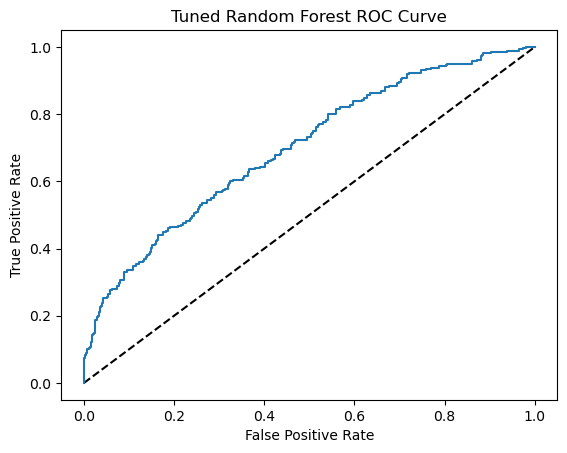

ROC AUC Score: 0.6982006886851932


In [28]:
# Evaluating Random Forest model performance with ROC Curve - AFTER
# =========================================================================================================================
from sklearn.metrics import roc_curve, roc_auc_score

# Proability of Random Forest Model
y_pred_probs = rf.predict_proba(X_test)[:, 1]
print(y_pred_probs[0])

# Compute the false positive rate, true positive rate and thresholds using the roc_curve function
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

# Plot the diagonal line, which represents a random classifier
plt.plot([0, 1], [0, 1], 'k--')

# Plot the ROC curve. Blue curve represents tuned Random Forest classifier's performance
plt.plot(fpr, tpr)

# Adding labels and title, and show the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Tuned Random Forest ROC Curve')
plt.show()

# Print out the Area Under Curve (AUC) score
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_probs)}")

---------------------------------------------------------------------------------------------------------------------------

##### In evaluating models across accuracy, confusion matrix, classification report, ROC Curve, and ROC AUC Score, it's evident that the optimized KNN Model and Random Forest are better than the tuned decision tree and the dummy baseline. While the tuned decision tree surpasses the baseline, it falls short compared to the optimized KNN Model and Random Forest across multiple metrics. Now, we are left with two models (KNN & Random Forest) with similar results that are better than the dummy baseline. We can compare them using boxplots.

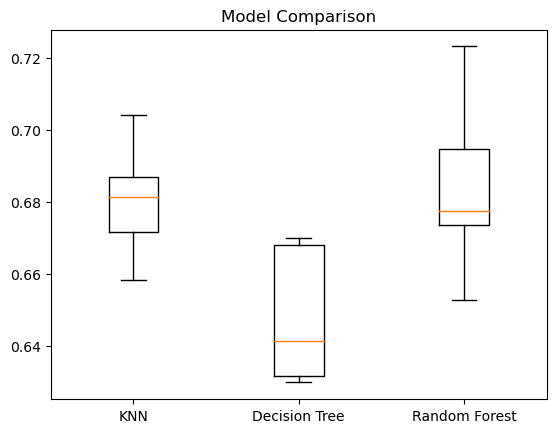

In [29]:
# Evaluating classification models using boxplots
# =========================================================================================================================
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Create a list of models (KNN, Decision Tree, Logistic Regression) - Parameters gotten from hyperparameter tuning earlier
models = {"KNN": KNeighborsClassifier(n_neighbors=10),
          "Decision Tree": DecisionTreeClassifier(max_depth=best_max_depth),
          "Random Forest": RandomForestClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'])}

# Create an empty list to store the cross validation results
results = []

# loop through models to get the cross validation results
for model in models.values():
    kf = KFold(n_splits=5, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kf)
    results.append(cv_results) # Push the cross validation results into the results list

# Plot the results using matplotlib boxplot
plt.boxplot(results, labels=models.keys()) 
plt.title("Model Comparison")
plt.show()

##### From the boxplot diagram, it shows that median accuracy score of KNN is the highest of all three models, and Decision Tree having the lowest accuracy. Secondly, although random forest has the higher maximum accuracy score, it is not as consistent as KNN model based on the length of the boxplots. Furthermore, random forest takes a much longer time to train due to higher complexity of the model as compared to other models like KNN, which took a much lesser time to train. Hence, judging from the boxplots, the time to train model and the consistency of the results, it seem that KNN is the best of the three model.


## End Of Report